In [1]:
import pandas as pd
import numpy as np
import copy
import random
from __future__ import division
from __future__ import with_statement
import minimization as minz #My script in same folder for minimization routines
import matplotlib.pyplot as plt
%matplotlib inline

###Functions

In [2]:
def import_processed_runs(experiment_clues, file_types, python_folder,\
                                    n_states , n_signals, n_rounds, N, n_parents):
    
    data = {} #dictionary will contain all dataframes imported
    for i,clue in enumerate(experiment_clues, 1): #experiments named 'experiment_clue'_i (from 1 to 5) 
        for content,variable in file_types.iteritems(): #iteritems gets key and data from dictionary
            experiment_globals = (content, clue ,n_states , n_signals, n_rounds, N, n_parents) #Save them as a list
            file_name = python_folder+"%s_%s_states_%s_signal_%s_rounds_%s_N_%s_parents_%s.txt" % experiment_globals
            
            df = pd.read_csv(file_name)
            df = df.drop('Unnamed: 0',1) #clean repeated index
            data['%s%s'%(variable, i)] = df #add to dataframe to a dictionary
    return data


#careful if changing i. Is for selecting one particular run (for example, to graph only one panel
#for data on 'nosignal3', then i=3). Be default is 1, so it starts in the first data set, and continuous from there
def create_panels_figure(data, df, variables, rows, cols, i=1):
    fig, axes = plt.subplots(rows, cols, squeeze=False, sharex=True, sharey=True) #squeeze allows creation of 1 col or 1 row
    i += (-1) #keep track of the number of panels
    for row in xrange(rows):
        for col in xrange(cols):
            i+=1
            for v in variables:
                my_label = ('Row' if v=='av_score_row' else 'Column' if v=='av_score_col' else '?')
                x = data[df+'%s'%i][v] #For example, df+'%s'%i = 'ep'+'2' = ep2, which is the name of dataframe
                axes[row][col].plot(x,label=my_label)
                
    #Change aesthetics
    
    plt.close()
    return fig, axes #export both the figure and subplots

#No signal runs 5

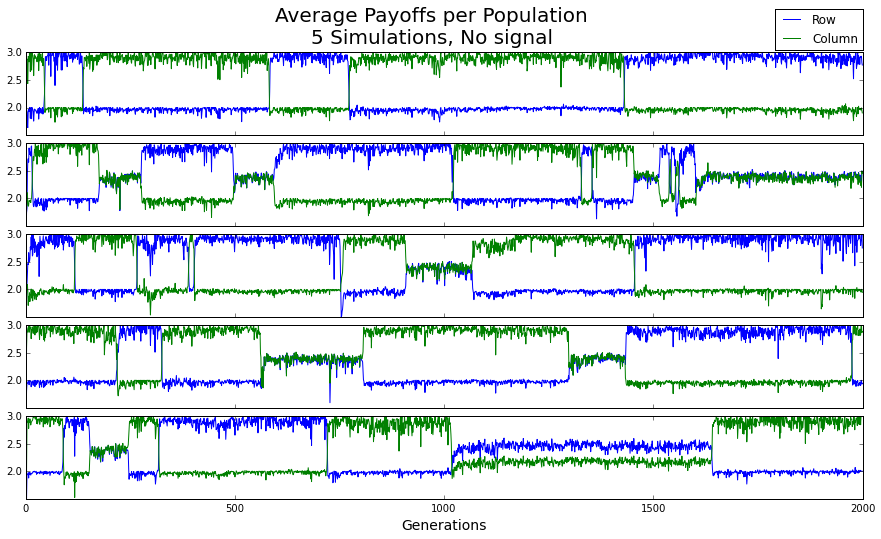

In [7]:
n_states = 8
n_signals = 0 #only without signal for now
n_rounds = 50
N = 40
n_parents = 20

experiment_clues = ['nosignal1','nosignal2','nosignal3','nosignal4','nosignal5', 'nosignal6']
file_types = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jms', 'summary':'summ'} #a shorter name for each type of data


#Path to Python outputs
python_folder = "/Users/luisalejandrolee/Dropbox/Thesis Phd/\
Coordination autos Chapter three/outputs_from_python/" #Python (minimization) outputs in this folder

#A dictionary with all the dataframes from the nosignalX treatments, for epochs, epochs_av, jms and summary.
shortns = import_processed_runs(experiment_clues, file_types, python_folder,\
                                                   n_states , n_signals, n_rounds, N, n_parents)

#####################################
#####################################

variables = ['av_score_row', 'av_score_col'] #in each panel
#variables = ['coordination_A_perc', 'coordination_B_perc']

#Create figure
fig,axes = create_panels_figure(shortns, 'summ', variables, rows=5, cols=1, i=2)

fig.suptitle('Average Payoffs per Population\n5 Simulations, No signal',fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0.1)
fig.set_size_inches(15, 8) #size of the whole figure

axes[0][0].set_ylim([1.5,3]) #since sharex=True, changing for one subplot changes all of them
axes[0][0].set_yticks([2,2.5,3])
axes[4][0].set_xlabel('Generations',fontsize=14)
axes[0][0].legend(bbox_to_anchor=(1.007, 1.6))


plt.close()

fig

#Super long no signal, 2 runs

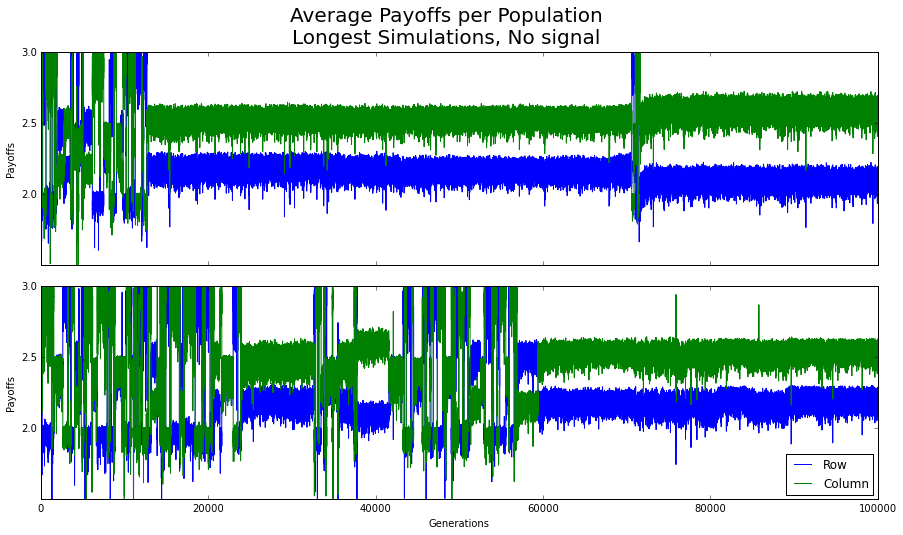

In [10]:
experiment_clues1 = ['nosignalsuperlong1','nosignalsuperlong2']
file_types1 = {'epochs_av':'ep', 'summary':'summ'} #a shorter name for each type of data

#A dictionary with all the dataframes from the nosignalX treatments, for epochs, epochs_av, jms and summary.
longns = import_processed_runs(experiment_clues1, file_types1, python_folder,\
                                                   n_states , n_signals, n_rounds, N, n_parents)

#Since for superlong can only run summary and epochs_av, then there are less files, so can unpack manually
ep1 = longns['ep1']
ep2 = longns['ep2']
summ1 = longns['summ1']
summ2 = longns['summ2']


#####################################
#####################################

variables = ['av_score_row', 'av_score_col']
#variables = ['coordination_A_perc', 'coordination_B_perc']


fig,axes = create_panels_figure(longns, 'summ', variables, rows=2, cols=1, i=1)

fig.suptitle('Average Payoffs per Population\nLongest Simulations, No signal',fontsize=20)
fig.subplots_adjust(wspace=0, hspace=0.1)
fig.set_size_inches(15, 8) #size of the whole figure

axes[0][0].set_ylim([1.5,3]) #since sharex=True, changing for one subplot changes all of them
axes[0][0].set_yticks([2,2.5,3])
axes[1][0].set_xlabel('Generations')
axes[0][0].set_ylabel('Payoffs')

axes[1][0].set_ylabel('Payoffs')
axes[1][0].legend(bbox_to_anchor=(1.002,0.24))
#axes[0][0].set_xlim([70000,72000])
plt.close()

fig

###Super long no signal (2 runs), generations 70k to 72k 

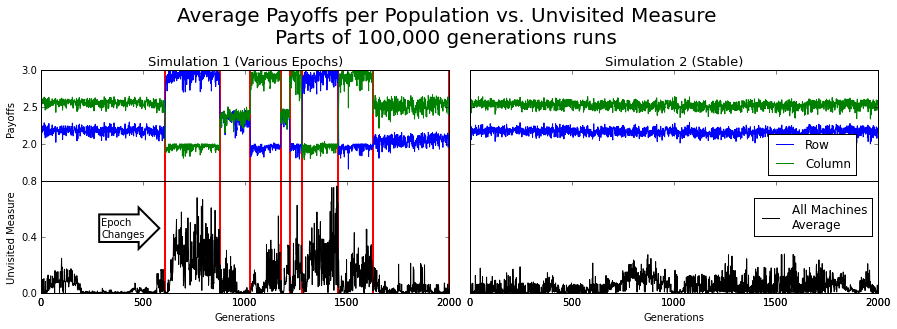

In [5]:
# To import parts of the same experiment, just make the experiment clue to start with the output modifier


experiment_clues = ['70to72k_nosignalsuperlong1','70to72k_nosignalsuperlong2']
#experiment_clues = ['70to72k_nosignalsuperlong1','70to72k_nosignalsuperlong2']
file_types = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jms', 'summary':'summ'} #a shorter name for each type of data

#A dictionary with all the dataframes from the nosignalX treatments, for epochs, epochs_av, jms and summary.
longns_70to72k = import_processed_runs(experiment_clues, file_types, python_folder,\
                                                   n_states , n_signals, n_rounds, N, n_parents)



#Graph unused states here for both panels (2 by 2: left-up payoffs, left-down unused states, right-up payoffs, down unused)
variables = ['av_score_row', 'av_score_col']

fig,axes = create_panels_figure(longns_70to72k, 'summ', variables, rows=1, cols=2, i=1)

fig.suptitle('Average Payoffs per Population vs. Unvisited Measure\nParts of 100,000 generations runs',fontsize=20,y=1.12)
fig.subplots_adjust(wspace=0.05, hspace=0)
fig.set_size_inches(15, 4) #size of the whole figure


ax1=fig.add_subplot(2,2,3)
um1 = longns_70to72k['summ1']['unvisited_measure']
ends1 = longns_70to72k['ep1']['end']
ax1.plot(um1,color='k')
ax1.vlines(ends1, 0, 1,linewidth=2,color='r')
ax1.set_ylim([0,0.8])
ax1.set_yticks([0,0.4,0.8])
ax1.set_ylabel('Unvisited Measure')
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="w", ec="k", lw=2)
ax1.annotate('Epoch\nChanges',xy=(300,0.4),bbox=bbox_props)

ax2=fig.add_subplot(2,2,4)
um2 = longns_70to72k['summ2']['unvisited_measure']
ax2.plot(um2,color='k',label='All Machines\nAverage')
ax2.set_ylim([0,0.8])
ax2.set_yticks([])
ax2.set_xlabel('Generations')
ax2.legend(bbox_to_anchor=(1,0.9))

axes[0][0].set_ylim([0,3]) #since sharex=True, changing for one subplot changes all of them
axes[0][0].set_yticks([2,2.5,3])
axes[0][0].set_xlabel('Generations')
axes[0][0].set_ylabel('Payoffs', y=0.78)
axes[0][0].vlines(ends1, 0, 3,linewidth=2,color='r')
axes[0][0].set_title('Simulation 1 (Various Epochs)',fontsize=13)
#axes[0][0].set_xticklabels([])

axes[0][1].set_title('Simulation 2 (Stable)',fontsize=13)
#axes[0][1].legend(bbox_to_anchor=(1.01,1.25))
axes[0][1].legend(bbox_to_anchor=(0.96,0.74))
#axes[0][0].set_xlim([70000,72000])



plt.close()
fig

###Frequency and lenght of epochs comparison

In [54]:
n_states = 8
n_signals = 0 #only without signal for now
n_rounds = 50
N = 40
n_parents = 20

#Treatments and runs have to be the same lenght (one list per treatment)
treatments = ['70to72k_nosignalsuperlong',] #outputmodifier+clue
runs = [[1,2],[]] #runs for each treatment. Each list has the runs to include for the corresponding treatment\
                         #(in same order as 'treatments')
info = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jmachines', 'summary':'summ'} #a shorter name for each type of data


folder = "/Users/luisalejandrolee/Dropbox/Thesis Phd/\
Coordination autos Chapter three/outputs_from_python/" #Python (minimization) outputs in this folder

def import_epochs_epochsjm_jointmachines_summary(treatments, runs, info, folder,\
                                    n_states , n_signals, n_rounds, N, n_parents):
    
    data = {} #dictionary will contain all dataframes imported
    for pos,treatment in enumerate(treatments): #all treatments
        for run in runs[pos]: #runs per treatment
            print run
            clue= treatment+str(run) #runs
            print clue
            for info_name, info_variable in info.iteritems():#For example, infoname=epochs_av, info_variable=ep
                
                inf = (info_name, clue, n_states , n_signals, n_rounds, N, n_parents)
                import_file = folder+'%s_%s_states_%s_signal_%s_rounds_%s_N_%s_parents_%s.txt'%inf
                #print import_file
                df = pd.read_csv(import_file)
                df = df.drop('Unnamed: 0',1)
                print 'pos = ', pos
                data['%s%s%s'%(info_variable, run, pos)] = df #add to dataframe to data dictionary
                
                print '\n%s%s%s'%(info_variable, run, pos)
    return data

data = import_epochs_epochsjm_jointmachines_summary(treatments, runs, info,\
                                                    folder, n_states , n_signals, n_rounds, N, n_parents)
len(data)
#test this redesigned function for imports

1
70to72k_nosignalsuperlong1
pos =  0

jmachines10
pos =  0

epj10
pos =  0

ep10
pos =  0

summ10
2
70to72k_nosignalsuperlong2
pos =  0

jmachines20
pos =  0

epj20
pos =  0

ep20
pos =  0

summ20


8

In [40]:
data

{'ep0':            epoch  duration  start   end
 0  Biased_Turn_A      1990     10  2000,
 'epj0':                                                 epoch  duration  start   end
 0   ((('A', 'A'), ('B', 'B'), ('A', 'A'), ('A', 'A...       394     10   404
 1                                       not_threshold        38    417   455
 2                                       not_threshold         3    469   472
 3   ((('A', 'A'), ('B', 'A'), ('A', 'A'), ('A', 'A...        14    477   491
 4                                       not_threshold        49    498   547
 5                                       not_threshold        23    565   588
 6   ((('A', 'B'), ('A', 'A'), ('A', 'A'), ('B', 'B...        82    595   677
 7                                       not_threshold        39    684   723
 8   ((('A', 'A'), ('B', 'A'), ('A', 'A'), ('A', 'A...         4    729   733
 9                                       not_threshold         6    743   749
 10  ((('A', 'A'), ('B', 'A'), ('A', 'A'), (

In [ ]:
n_states = 8
n_signals = 0 #only without signal for now
n_rounds = 50
N = 40
n_parents = 20

experiment_clues = ['nosignal1','nosignal2','nosignal3','nosignal4','nosignal5', 'nosignal6']
file_types = {'epochs_av':'ep', 'epochs_jm':'epj', 'jm':'jms', 'summary':'summ'} #a shorter name for each type of data


#Path to Python outputs
python_folder = "/Users/luisalejandrolee/Dropbox/Thesis Phd/\
Coordination autos Chapter three/outputs_from_python/" #Python (minimization) outputs in this folder

    
def import_processed_runs(experiment_clues, file_types, python_folder,\
                                    n_states , n_signals, n_rounds, N, n_parents):
    
    data = {} #dictionary will contain all dataframes imported
    for i,clue in enumerate(experiment_clues, 1): #experiments named 'experiment_clue'_i (from 1 to 5) 
        for content,variable in file_types.iteritems(): #iteritems gets key and data from dictionary
            experiment_globals = (content, clue ,n_states , n_signals, n_rounds, N, n_parents) #Save them as a list
            file_name = python_folder+"%s_%s_states_%s_signal_%s_rounds_%s_N_%s_parents_%s.txt" % experiment_globals
            
            df = pd.read_csv(file_name)
            df = df.drop('Unnamed: 0',1) #clean repeated index
            data['%s%s'%(variable, i)] = df #add to dataframe to a dictionary
    return data

In [ ]:
#Useful lines (not part of the code, but just to copy easily)

#Basic for a plot
data=[3,2,10]
fig,ax=plt.subplots(2,2,squeeze=False,sharex=True,sharey=Ture)
ax[0][0].plot(data)
ax[1][1].plot(data)
plt.close()



plt.vlines(x, ymin, ymax) #horizontal and vertical lines
plt.hlines(y, xmin, xmax)

#ax is the name of the plot. If used fig, axes = plt.subplot(2,2) to create several, they can be indexed
ax.set_yscale('log') #some regularly useful 'set' functions
ax.set_xlim([0,10])
ax.set_xlabel('some label')

fig.tight_layout() #avoids overlapping of axis ticks

#small code for adding several vertical lines in a particular plot (first make the relevant figure to be current)
h_values = [200, 300, 400]
for v in h_values:
    axes[0][0].vlines(v,0,3,linewidth=5, color='r')

axes[0][0].set_title('5 Simulations, No signal')
axes[0][0].set_xlabel('Generations')
axes[0][0].set_ylabel('Average Payoffs')


